<h1> Processing and Visualisation of results </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [2]:
hto_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/results.csv")

In [3]:
hto_results.columns = ["hashtag","classification"]

In [4]:
hto_results.head()

,hashtag,classification
0,AGGCCACAGCGTCTAT,Singlet
1,ATTGGTGAGTTCGCAT,Doublet
2,GTGCAGCTCAGTCCCT,Singlet
3,TAGTTGGGTCATACTG,Singlet
4,TTCTTAGAGAAGGCCT,Singlet


In [5]:
htoDemul = hto_results['classification'].value_counts()

In [6]:
htoDemul_dict = htoDemul.to_dict()


In [7]:
htoDemul_dict['Algorithm'] = "HTODemul"
htoDemul_dict

{'Singlet': 13900, 'Doublet': 2433, 'Negative': 583, 'Algorithm': 'HTODemul'}

In [8]:
multi_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/multiseq-result.csv")

In [9]:
multi_results.columns = ["hashtag","classification"]

In [10]:
multi_results

,hashtag,classification
0,AGGCCACAGCGTCTAT,HTO-H
1,ATTGGTGAGTTCGCAT,Doublet
2,GTGCAGCTCAGTCCCT,HTO-H
3,TAGTTGGGTCATACTG,HTO-H
4,TTCTTAGAGAAGGCCT,HTO-D
...,...,...
16911,AGCGTCGAGTGGGATC,Doublet
16912,AACACGTGTAGCCTCG,Doublet
16913,AGCGTCGAGGGCTTCC,Doublet
16914,GTCGGGTAGCATGGCA,Doublet


In [11]:
multiseq = multi_results['classification'].value_counts()

In [12]:
multiseq

Doublet    5633
HTO-D      1703
HTO-B      1668
HTO-G      1572
HTO-H      1434
HTO-E      1268
HTO-C      1253
HTO-F      1235
HTO-A      1150
Name: classification, dtype: int64

In [13]:
multiseq_res_dict = multiseq.to_dict()

In [14]:
multiseq_res_dict 

{'Doublet': 5633,
 'HTO-D': 1703,
 'HTO-B': 1668,
 'HTO-G': 1572,
 'HTO-H': 1434,
 'HTO-E': 1268,
 'HTO-C': 1253,
 'HTO-F': 1235,
 'HTO-A': 1150}

In [15]:
multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet')

/var/folders/10/sfmvfl9139b7z3wwbq1j88gr0000gn/T/ipykernel_4866/599037296.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet')


In [16]:
multiseq_dict = dict()
multiseq_dict['Singlet'] = multi_singlets

In [17]:
multiseq_dict['Doublet'] = multiseq_res_dict['Doublet']

In [18]:
multiseq_dict['Negative'] = 0

In [19]:
multiseq_dict['Algorithm'] = "MULTI-Seq"

In [20]:
dd = defaultdict(list)
for d in (htoDemul_dict, multiseq_dict): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dd)

defaultdict(<class 'list'>, {'Singlet': [13900, 11283], 'Doublet': [2433, 5633], 'Negative': [583, 0], 'Algorithm': ['HTODemul', 'MULTI-Seq']})


In [21]:
dict(dd)

{'Singlet': [13900, 11283],
 'Doublet': [2433, 5633],
 'Negative': [583, 0],
 'Algorithm': ['HTODemul', 'MULTI-Seq']}

In [41]:
bool(dict(dd))

True

In [22]:
dfObj = pd.DataFrame(dict(dd))

In [43]:
dfObj

,Singlet,Doublet,Negative,Algorithm
0,13900,2433,583,HTODemul
1,11283,5633,0,MULTI-Seq


<AxesSubplot:title={'center':'Hashing Demultiplexing by algorithm'}, xlabel='Algorithm'>

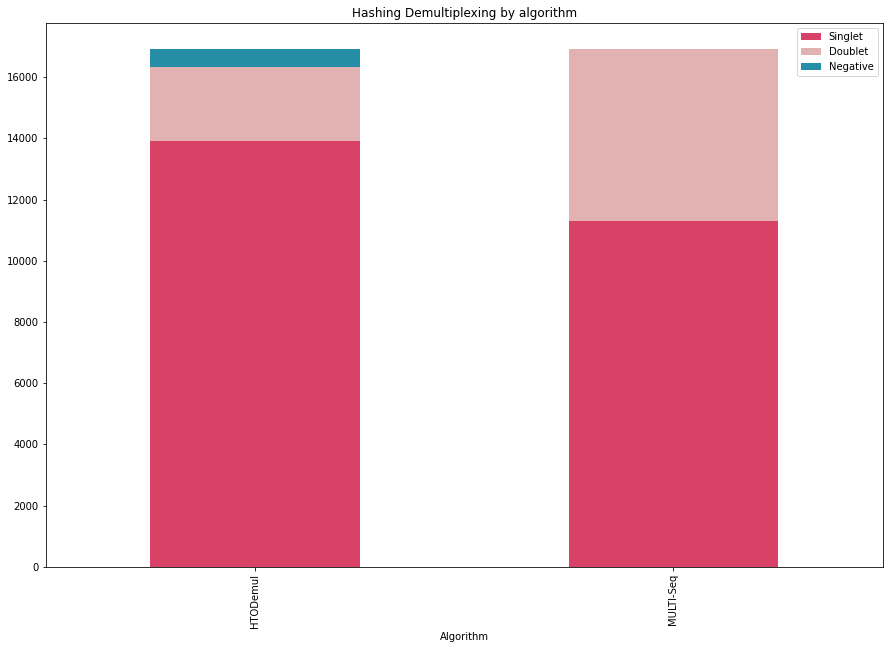

In [35]:
dfObj.plot.bar(x='Algorithm', stacked=True,color=["#DA4167","#E2B1B1","#258EA6"], title='Hashing Demultiplexing by algorithm',figsize=(15, 10))


In [36]:
pip freeze

adjustText==0.7.3
anndata==0.8.0
appnope @ file:///opt/concourse/worker/volumes/live/6ca6f098-d773-4461-5c91-a24a17435bda/volume/appnope_1606859448531/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///opt/concourse/worker/volumes/live/42cf1b28-e71f-45ed-47b2-50f828088636/volume/argon2-cffi-bindings_1644569709119/work
asciitree==0.3.3
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4 @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_croot-cdiouih5/beautifulsoup4_1650462164803/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
certifi==2022.5.18.1
cffi @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/croot-2p6q7e2r/cffi_1642701115063/work
click==8.1.3
cycler==0.11.0
Cython==0.29.30
debugpy @ file:///opt/concourse/worke